IMPORTING LIBRARIES

In [2]:
import pandas as pd
import random
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import imghdr
import seaborn as sns
import tensorflow as tf
from PIL import Image

from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.utils.class_weight import compute_class_weight

from tensorflow.keras import layers, models, regularizers, optimizers
from tensorflow.keras.applications import VGG16, ResNet50V2
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, TensorBoard, CSVLogger
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense, Activation, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.utils import plot_model

DATA CLEANING


In [3]:
image_exts = ['jpeg','png','jpg']

data_dir = 'train'

for root, dirs, files in os.walk(data_dir):
    for file in files:

        file_path = os.path.join(root, file)

        try:
            file_type = imghdr.what(file_path)

            if file_type not in image_exts:
                print(f'Image not in ext list {file_path}')
                os.remove(file_path)
            else:
                img = cv2.imread(file_path)

        except Exception as e:
            print(f'Issue with file {file_path}. Error: {e}')
            os.remove(file_path)

In [7]:
def count_files_insubdirs(directory, set_name):

    counts = {}

    for item in os.listdir(directory):
        item_path = os.path.join(directory, item)

        if os.path.isdir(item_path):

            counts[item] = len(os.listdir(item_path))

    df = pd.DataFrame(counts, index=[set_name])
    return df


train_dir = 'train'
test_dir = 'test'

train_count = count_files_insubdirs(train_dir,'train')
print(train_count)

test_count = count_files_insubdirs(test_dir, 'test')
print(test_count)

       angry  disgust  fear  happy  neutral   sad  surprise
train   3995      436  4097   7215     4965  4830      3171
      angry  disgust  fear  happy  neutral   sad  surprise
test    958      111  1024   1774     1233  1247       831


<Axes: >

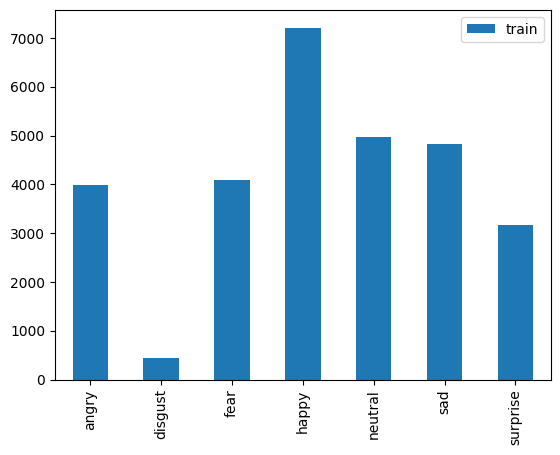

In [8]:
train_count.transpose().plot(kind='bar')

<Axes: >

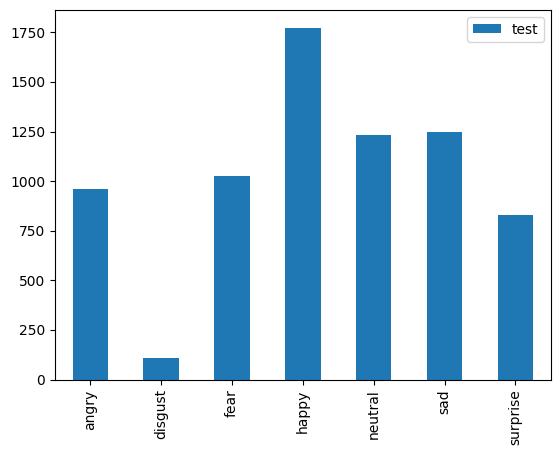

In [9]:
test_count.transpose().plot(kind= 'bar')

PLOTTING EACH EMOTION


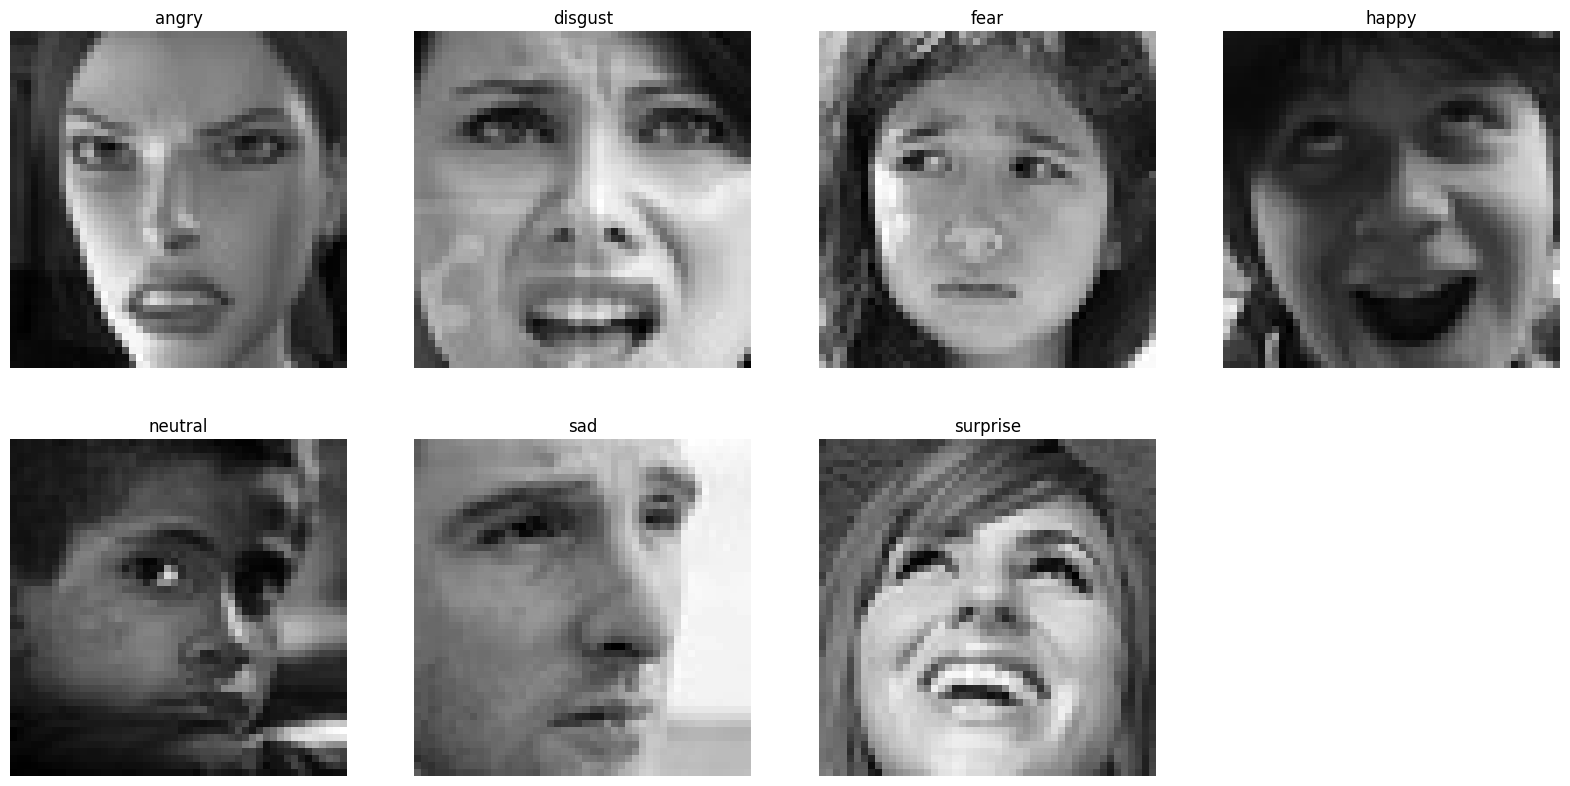

In [10]:
emotions = os.listdir(train_dir)
plt.figure(figsize=(20,15))

for i, emotion in enumerate(emotions, 1):

    folder = os.path.join(train_dir, emotion)
    image_path = os.path.join(folder, os.listdir(folder)[5])
    image = plt.imread(image_path)
    plt.subplot(3, 4, i)
    plt.imshow(image, cmap= 'gray')
    plt.title(emotion)
    plt.axis('off')

In [15]:
def plot_images_from_directory(directory_path, class_name, num_images = 9):

    image_filenames = os.listdir(directory_path)

    if len(image_filenames) < num_images:
        print(f"Only found {len(image_filenames)} images in {directory_path}, displaying them all.")
        num_images = len(image_filenames)

    selected_images = random.sample(image_filenames, num_images)

    fig, axes = plt.subplots(3, 3, figsize=(10,10))

    axes = axes.ravel()

    for i, image_file in enumerate(selected_images):

        image_path = os.path.join(directory_path, image_file)

        image = load_img(image_path)
        axes[i].imshow(image)
        axes[i].set_title(f"Image: {class_name}")
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

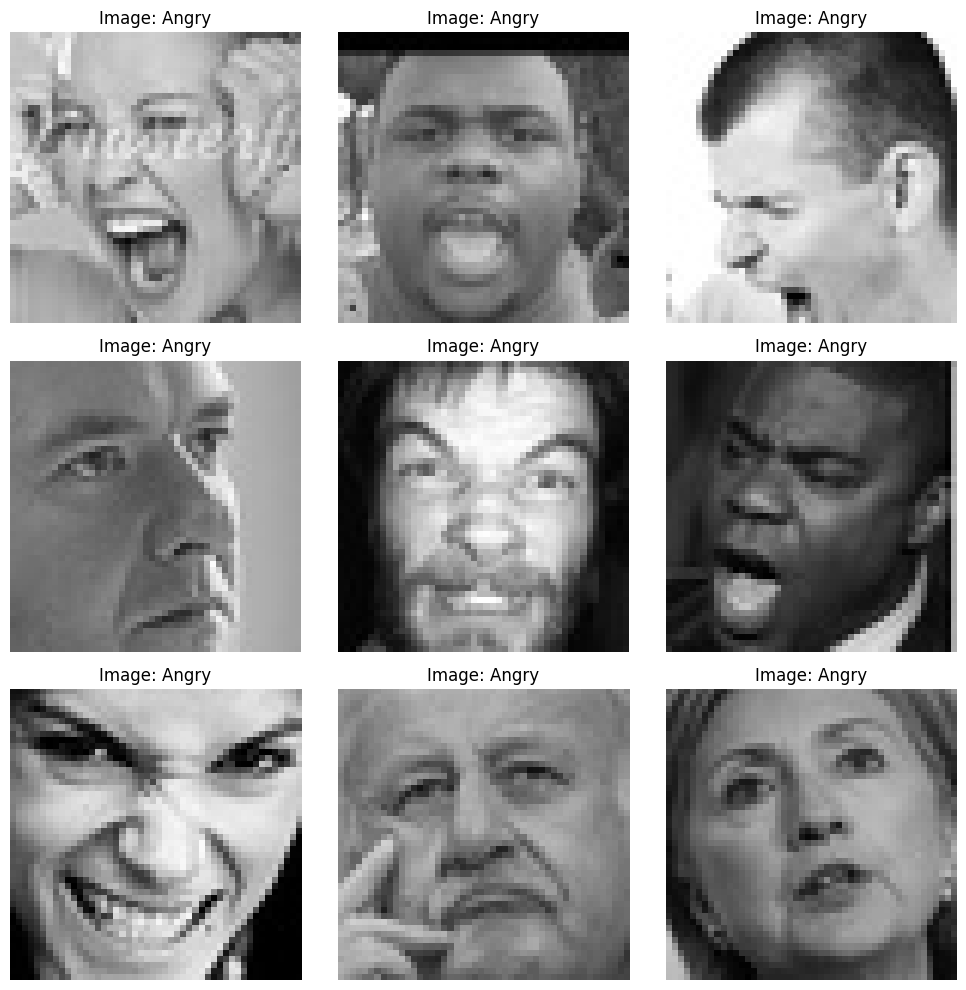

In [16]:
angry_directory_path = 'train/angry'  
plot_images_from_directory(angry_directory_path, class_name = 'Angry')

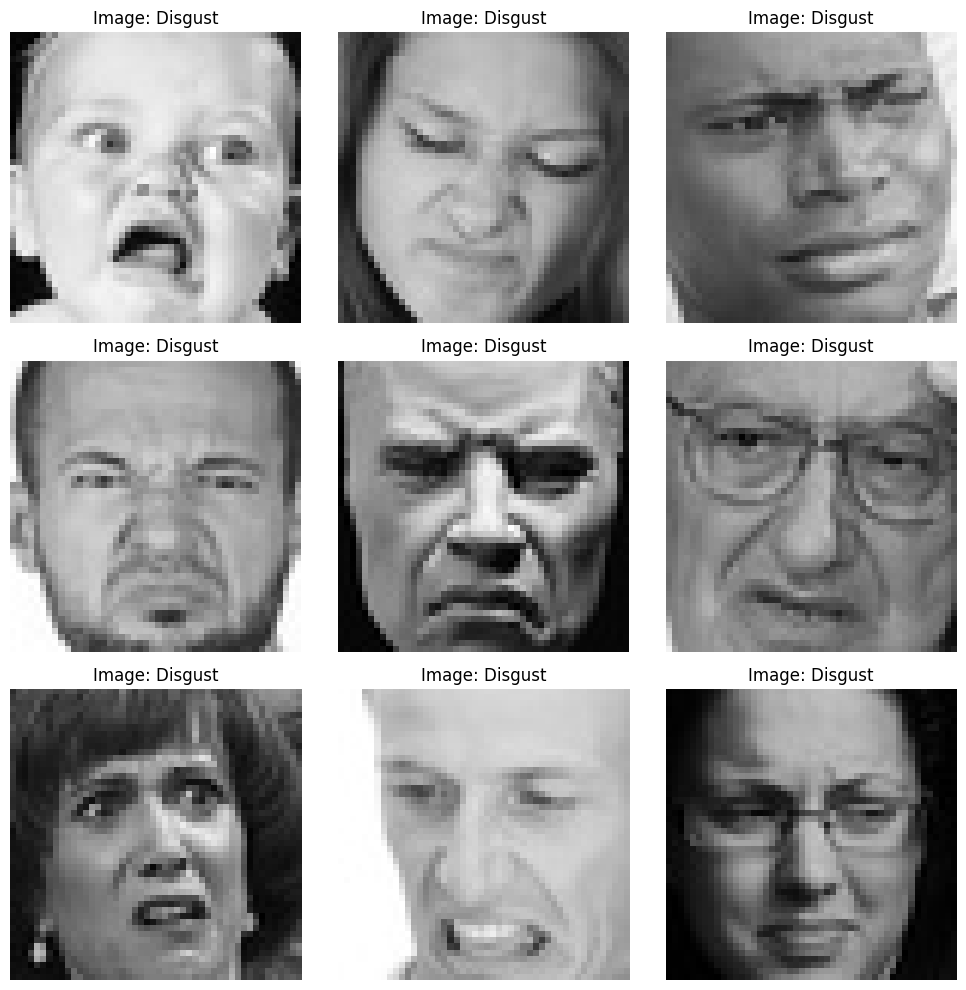

In [17]:
disgust_directory_path = 'train/disgust'  
plot_images_from_directory(disgust_directory_path, class_name = 'Disgust')

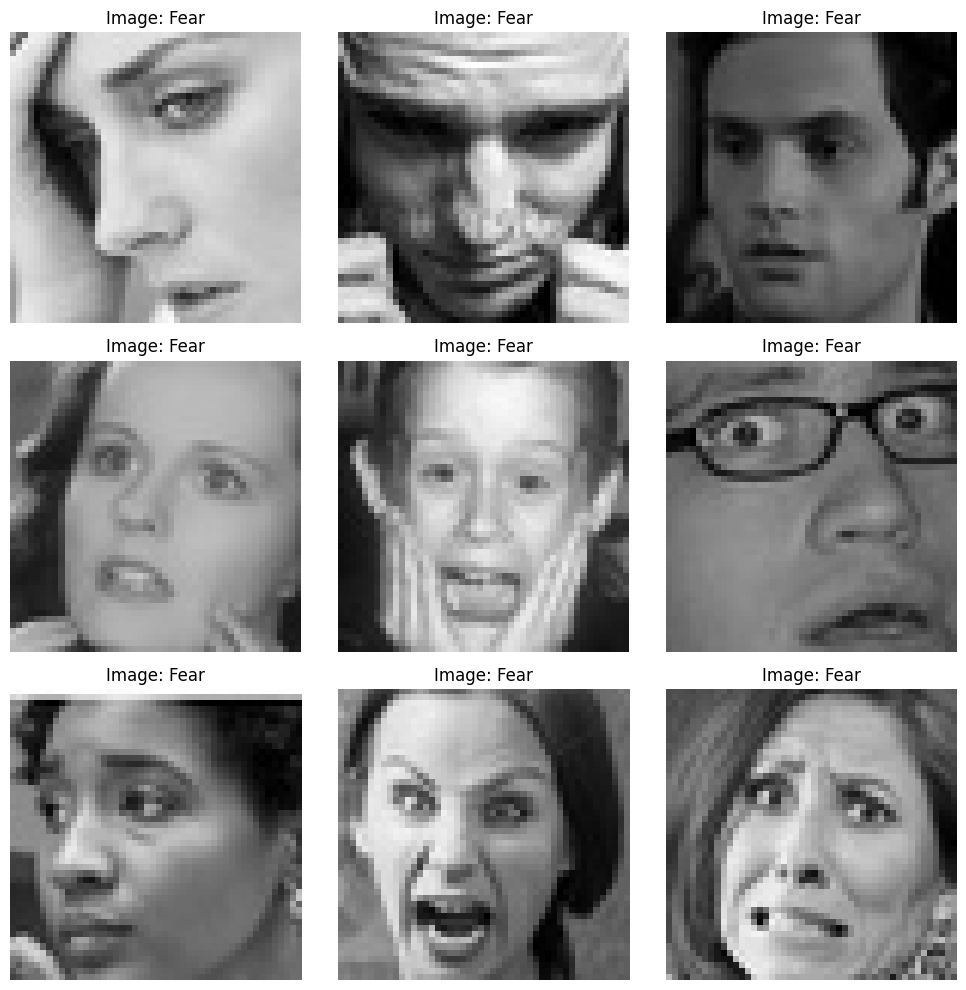

In [19]:
fear_directory_path = 'train/fear'  
plot_images_from_directory(fear_directory_path, class_name = 'Fear')